In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
df_1 = pd.read_csv ('clean_df.csv') # This df has non-log-transformed variables. This will be helpful when writing visualizations
df_1.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,286,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,343,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,56,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,343,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,49,2


In [3]:
df = pd.read_csv('final_df.csv')
df.head()

,id,price,bedrooms,bathrooms,floors,condition,grade,sqft_basement,yr_renovated,day_of_year,...,yr_built_1960_1980,yr_built_1980_2000,yr_built_2000_2020,renovpost2000_1,high_zip_1,low_zip_1,sector_1,sector_2,sector_3,sector_4
0,7129300520,0.227669,0.314203,0.250000,1.0,3,7,0.0,0.0,286,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,0.420522,0.314203,0.542481,2.0,3,7,400.0,1991.0,343,...,0,0,0,0,0,0,1,0,0,0
2,5631500400,0.182099,0.198240,0.250000,1.0,3,6,0.0,0.0,56,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,0.445720,0.396480,0.646241,1.0,5,7,910.0,0.0,343,...,1,0,0,0,0,0,1,0,0,0
4,1954400510,0.408883,0.314203,0.500000,1.0,3,8,0.0,0.0,49,...,0,1,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21143 non-null  int64  
 1   price               21143 non-null  float64
 2   bedrooms            21143 non-null  float64
 3   bathrooms           21143 non-null  float64
 4   floors              21143 non-null  float64
 5   condition           21143 non-null  int64  
 6   grade               21143 non-null  int64  
 7   sqft_basement       21143 non-null  float64
 8   yr_renovated        21143 non-null  float64
 9   day_of_year         21143 non-null  int64  
 10  month               21143 non-null  int64  
 11  log_sqft_above      21143 non-null  float64
 12  log_sqft_living     21143 non-null  float64
 13  log_sqft_living15   21143 non-null  float64
 14  log_sqft_lot        21143 non-null  float64
 15  log_sqft_lot15      21143 non-null  float64
 16  wate

# Official Model 1
- Preliminary Versions can be found in a separate notebook

In [5]:
outcome = 'price'
predictors = df.drop(['price', 'sqft_basement', 'id', 'yr_renovated'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     3956.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:13:15   Log-Likelihood:                 33801.
No. Observations:               21143   AIC:                        -6.755e+04
Df Residuals:                   21118   BIC:                        -6.735e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0198      0.005     -4.026      0.000      -0.029      -0.010
bedrooms              -0.0562      0.006     -9.720      0.000      -0.068      -0.045
bathrooms              0.0359      0.004      8.103      0.000       0.027       0.045
floors                -0.0010      0.001     -0.988      0.323      -0.003       0.001
condition              0.0142      0.001     24.382      0.000       0.013       0.015
grade                  0.0294      0.001     56.921      0.000       0.028       0.030
day_of_year           -0.0001    3.9e-05     -3.440      0.001      -0.000   -5.78e-05
month                  0.0029      0.001      2.444      0.015       0.001       0.005
log_sqft_above         0.0443      0.007      6.577      0.000       0.031       0.057
log_sqft_living        0.2644      0.008     32.250      0.000       0.248       0.280
log_sqft_living15      0.1019      0.005     21.448      0.000       0.093       0.111
log_sqft_lot           0.0660      0.004     15.522      0.000       0.058       0.074
log_sqft_lot15         0.0335      0.004      7.832      0.000       0.025       0.042
waterfront_1_0         0.1376      0.004     32.862      0.000       0.129       0.146
yr_built_1900_1940    -0.0150      0.005     -2.772      0.006      -0.026      -0.004
yr_built_1940_1960    -0.0396      0.005     -7.321      0.000      -0.050      -0.029
yr_built_1960_1980    -0.0553      0.005    -10.181      0.000      -0.066      -0.045
yr_built_1980_2000    -0.0557      0.005    -10.167      0.000      -0.066      -0.045
yr_built_2000_2020    -0.0456      0.006     -8.293      0.000      -0.056      -0.035
renovpost2000_1        0.0310      0.003     11.225      0.000       0.026       0.036
high_zip_1             0.0609      0.001     50.141      0.000       0.059       0.063
low_zip_1             -0.0352      0.002    -23.426      0.000      -0.038      -0.032
sector_1               0.0231      0.006      3.698      0.000       0.011       0.035
sector_2               0.0022      0.006      0.355      0.723      -0.010       0.014
sector_3              -0.0669      0.006    -10.540      0.000      -0.079      -0.054
sector_4              -0.0704      0.006    -11.193      0.000      -0.083      -0.058
==============================================================================
Omnibus:                      631.857   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1489.462
Skew:                          -0.137   Prob(JB):                         0.00
Kurtosis:                       4.271   Cond. No.                     6.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

## Incredible R-Squared! Let's dig in and examine the errors. 

In [6]:
data = df
y = data['price']
X = data.drop(['price','id','sqft_basement', 'yr_renovated'], axis = 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.002399083080050952
Test Mean Squarred Error: 0.0023733334050717834


In [9]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 0.04898043568661831
Test Root Mean Squarred Error: 0.04871686982013298


### ...I do not know how to react... the model's ability to predict comes within a few cents?

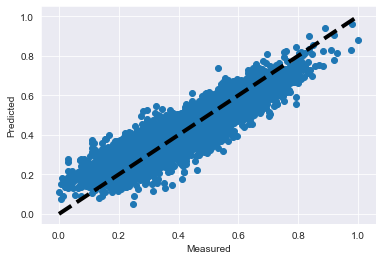

In [10]:
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

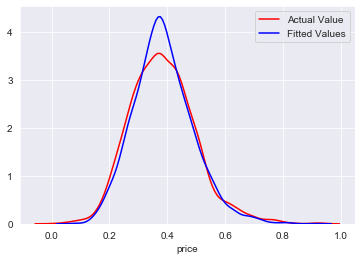

In [11]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [12]:
# Difference between what we expect and the actual values. Could be due to all the normalizing we did?

## Excitement abounds! The model seems to predict quite well. 

## Check for Normality

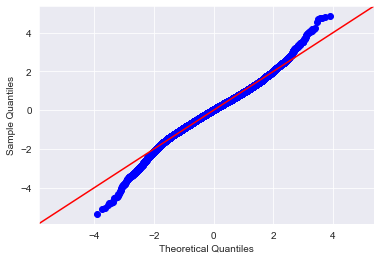

In [13]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [14]:
# Heaviness in the tails noted. 

### Check for Homoscedasticity

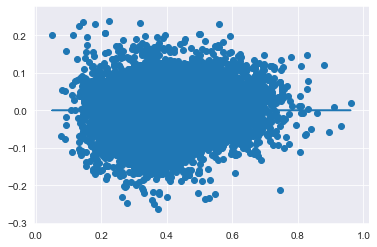

In [15]:
plt.scatter(model.predict(predictors), model.resid)
plt.plot(model.predict(predictors), [0 for i in range(len(df))]);

In [16]:
# We seem pretty homoscedastic here!

In [17]:
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")

In [18]:
cv_10_results

array([-0.00238898, -0.00246567, -0.00242945, -0.00255215, -0.00230134,
       -0.00241869, -0.00236951, -0.00243093, -0.00255498, -0.00211766])

In [19]:
print('Test Mean Squarred Error:', mse_test)
print ('Results of 10-fold cross-validation test: ', cv_10_results.mean())

Test Mean Squarred Error: 0.0023733334050717834
Results of 10-fold cross-validation test:  -0.002402934976705593


In [20]:
# We can stop here, it seems.

# Alright, let's talk about what all this means:

In [21]:
model.params.sort_values(ascending=False)
# Sort values in descending order in terms of how they affect price.

log_sqft_living       0.264358
waterfront_1_0        0.137624
log_sqft_living15     0.101865
log_sqft_lot          0.066012
high_zip_1            0.060909
log_sqft_above        0.044289
bathrooms             0.035919
log_sqft_lot15        0.033526
renovpost2000_1       0.030952
grade                 0.029434
sector_1              0.023145
condition             0.014242
month                 0.002899
sector_2              0.002221
day_of_year          -0.000134
floors               -0.001026
yr_built_1900_1940   -0.015011
Intercept            -0.019767
low_zip_1            -0.035170
yr_built_1940_1960   -0.039611
yr_built_2000_2020   -0.045630
yr_built_1960_1980   -0.055276
yr_built_1980_2000   -0.055681
bedrooms             -0.056225
sector_3             -0.066864
sector_4             -0.070417
dtype: float64

In [22]:
model.params.log_sqft_living * 100

# Seems to mean that a 10% increase in the square feet leads to a 26% increase in price
# A 4000 sq. ft. house that costs 500,000 dollars could increase to 4400 sq. ft. and to $625,000 
# (If you had the ability to renovate?)

26.435827611212176

In [23]:
model.params.waterfront_1_0 * 100

# Seems to mean that a waterfront view leads to a 13% increase in price

13.762433783608325

In [24]:
model.params.log_sqft_living15 * 100

# Seems to mean that a 10% increase in the square feet of the houses of the 15 nearest neighbors leads to a 10% increase in price

10.186487089804503

# Presentation Prep

## What information are we interested in for first time buyers?
- First of all, what are the most important features when considering price?
    - Since the average salary of someone in King County is 99,000 dollars, perhaps a cap on price of 500,000 would be a good idea for the next few questions:
- What size house should we be looking at with a max budget of 500,000 dollars?
- What about the size of our neighbors' houses?
- Where in Seattle should we set ourselves up with a max budget of 500,000 dollars?

In [25]:
order_of_features = model.params.drop(['Intercept']).abs().sort_values(ascending=True)
# Drop intercept since it is not a parameter that concerns us.

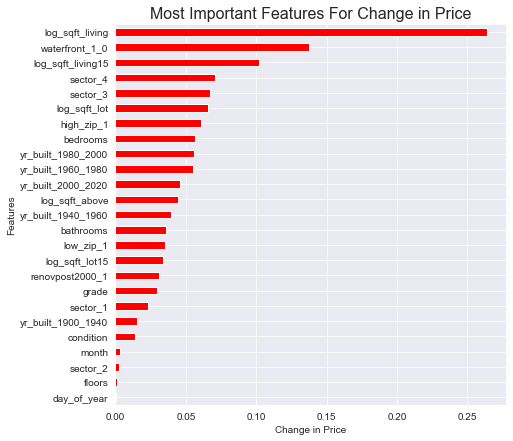

In [26]:
order_of_features.plot(kind='barh' , color='red', figsize=(7,7));
plt.title('Most Important Features For Change in Price', fontsize=16);
plt.xlabel("Change in Price");
plt.ylabel("Features");
# Create a bar graph that orders our most important features for price change

### Below we have plots for the living space of neighbors as well as our buyers.
- The first plot just considers budget. The second will zoom in on the data relevant to our buyers to create a better picture.

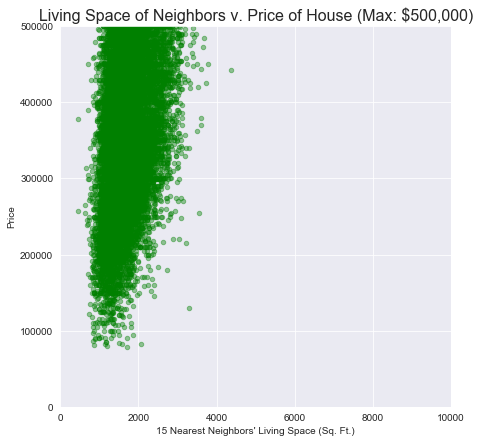

In [27]:
df_1.plot(kind='scatter', x='sqft_living15', y='price', alpha=0.4, color='green', figsize=(7,7))
plt.xlim(0, 10000)
plt.ylim(0, 500000)
plt.xlabel("15 Nearest Neighbors' Living Space (Sq. Ft.)");
plt.ylabel("Price")
plt.title('Living Space of Neighbors v. Price of House (Max: $500,000)', fontsize=16);
plt.show();

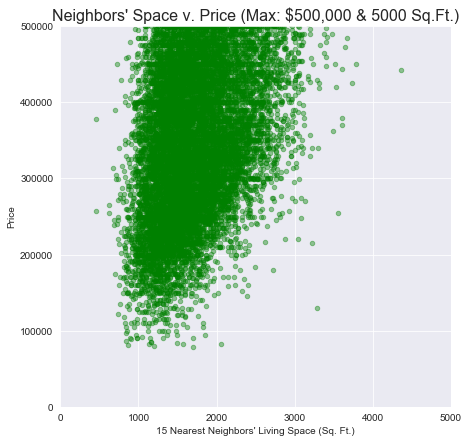

In [28]:
df_1.plot(kind='scatter', x='sqft_living15', y='price', alpha=0.4, color='green', figsize=(7,7))
plt.xlim(0, 5000)
plt.ylim(0, 500000)
plt.xlabel("15 Nearest Neighbors' Living Space (Sq. Ft.)");
plt.ylabel("Price")
plt.title("Neighbors' Space v. Price (Max: $500,000 & 5000 Sq.Ft.)", fontsize=16);
plt.show();

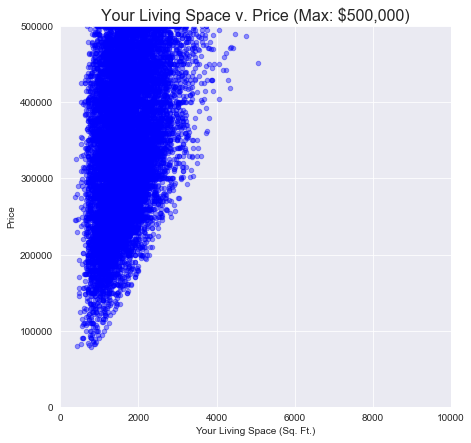

In [29]:
df_1.plot(kind='scatter', x='sqft_living', y='price', alpha=0.4, color='blue', figsize=(7,7))
plt.xlim(0, 10000)
plt.ylim(0, 500000)
plt.xlabel("Your Living Space (Sq. Ft.)");
plt.ylabel("Price")
plt.title('Your Living Space v. Price (Max: $500,000)', fontsize=16);
plt.show();

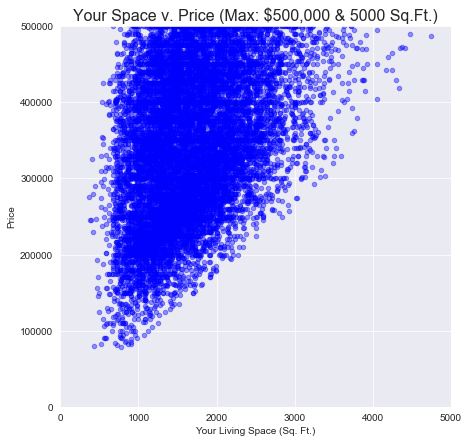

In [30]:
df_1.plot(kind='scatter', x='sqft_living', y='price', alpha=0.4, color='blue', figsize=(7,7))
plt.xlim(0, 5000)
plt.ylim(0, 500000)
plt.xlabel("Your Living Space (Sq. Ft.)");
plt.ylabel("Price")
plt.title('Your Space v. Price (Max: $500,000 & 5000 Sq.Ft.)', fontsize=16);
plt.show(); 

### We imagine Waterfront isn't going to be a choice location for our buyers but there may be a few houses that fit the budget. We created a visualization for them here:

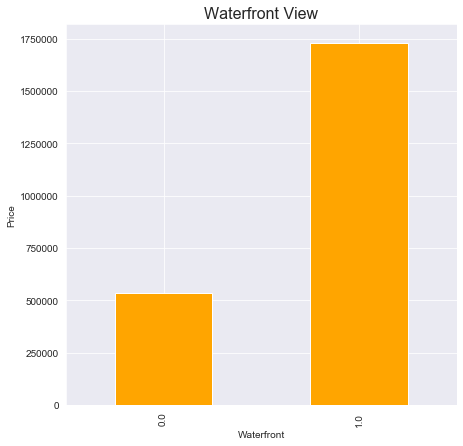

In [31]:
waterfront_v_price = df_1.groupby('waterfront')['price'].mean()
waterfront_v_price.plot(kind='bar' , color='orange', figsize=(7,7));
plt.title('Waterfront View', fontsize=16);
plt.xlabel("Waterfront");
plt.ylabel("Price");

### Finally, what location in Seattle would be best for our buyers? Let's create a map.

In [32]:
df2 = df_1[df_1["price"] <= 500000]


In [33]:
df3 = df2[df2["sqft_living"] <= 4000]


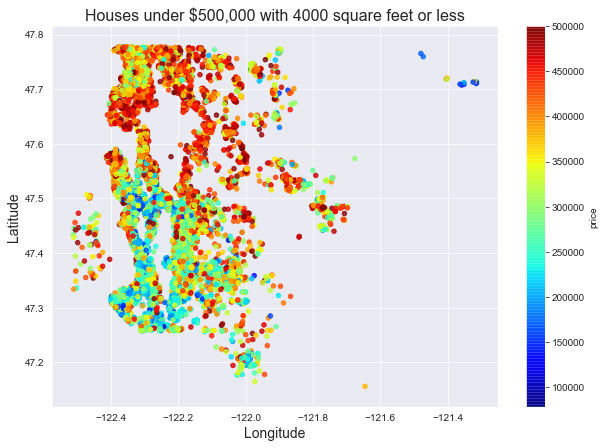

In [34]:
df3.plot(kind="scatter", x='long', y='lat',
    c='price', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.8, sharex=False, figsize=(10,7),)
plt.title('Houses under $500,000 with 4000 square feet or less', fontsize=16);
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show();

# Conclusions:

1. The square feet of the home itself is the most important piece of information when it comes to change in price.
    - Could be something to think about when it comes to an investment for our FTBs
2. The square feet of those living nearby you with a maximum budget of 500,000 dollars will be between 1000 and 3000 square feet.
3. The square feet you should be looking for with a max price of 500,000 dollars is around 3000, although there are a few 4000 sq. ft. houses available
4. If the house has a waterfront view, there is a major impact in price however first-time buyers might not be able to afford a house like this at the moment. 
4. If you are trying to be frugal, it would be best to look in the southwest of King County, particularly around Federal Way (Zip Codes: 98001, 98003, 98023, 98063, 98093)